# Hello

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv("dataset.csv")
dataset.head()
columns = dataset.columns
print(columns)

Index(['Total Household Income', 'Region', 'Total Food Expenditure',
       'Main Source of Income', 'Agricultural Household indicator',
       'Bread and Cereals Expenditure', 'Total Rice Expenditure',
       'Meat Expenditure', 'Total Fish and  marine products Expenditure',
       'Fruit Expenditure', 'Vegetables Expenditure',
       'Restaurant and hotels Expenditure', 'Alcoholic Beverages Expenditure',
       'Tobacco Expenditure', 'Clothing, Footwear and Other Wear Expenditure',
       'Housing and water Expenditure', 'Imputed House Rental Value',
       'Medical Care Expenditure', 'Transportation Expenditure',
       'Communication Expenditure', 'Education Expenditure',
       'Miscellaneous Goods and Services Expenditure',
       'Special Occasions Expenditure', 'Crop Farming and Gardening expenses',
       'Total Income from Entrepreneurial Acitivites', 'Household Head Sex',
       'Household Head Age', 'Household Head Marital Status',
       'Household Head Highest Grade Compl

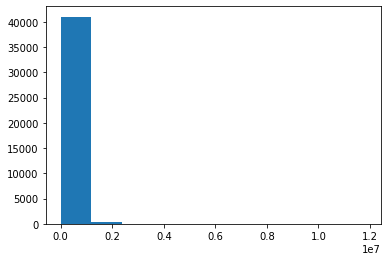

In [3]:
plt.figure()
plt.hist(dataset['Total Household Income'])
plt.show()

In [4]:
dataset['Total Household Income'].describe()

count    4.154400e+04
mean     2.475556e+05
std      2.868805e+05
min      1.128500e+04
25%      1.048950e+05
50%      1.640795e+05
75%      2.911385e+05
max      1.181599e+07
Name: Total Household Income, dtype: float64

<AxesSubplot:xlabel='Total Household Income'>

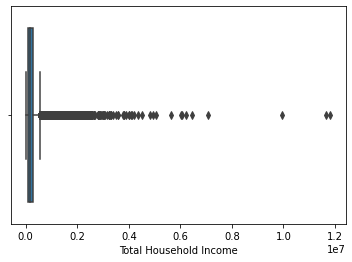

In [5]:
sns.boxplot(x=dataset['Total Household Income'])

#### Determine target

In [6]:
Q1 = dataset['Total Household Income'].quantile(0.25)
Q3 = dataset['Total Household Income'].quantile(0.75)

In [7]:
Q1_boundary = (dataset['Total Household Income'] <= Q1).sum()
Q3_boundary = (dataset['Total Household Income'] > Q3).sum()
Q2_boundary = dataset['Total Household Income'].count() - Q1_boundary - Q3_boundary
print("Q1 count: ", Q1_boundary, "Q2 count: ", Q2_boundary, "Q3 count: ", Q3_boundary)

Q1 count:  10387 Q2 count:  20771 Q3 count:  10386


In [8]:
dataset['target'] = pd.qcut(dataset['Total Household Income'], q=4)

### Data Cleaning

In [9]:
dataset.head()

,Total Household Income,Region,Total Food Expenditure,Main Source of Income,Agricultural Household indicator,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,...,Number of Washing Machine,Number of Airconditioner,"Number of Car, Jeep, Van",Number of Landline/wireless telephones,Number of Cellular phone,Number of Personal Computer,Number of Stove with Oven/Gas Range,Number of Motorized Banca,Number of Motorcycle/Tricycle,target
0,480332,CAR,117848,Wage/Salaries,0,42140,38300,24676,16806,3325,...,1,0,0,0,2,1,0,0,1,"(291138.5, 11815988.0]"
1,198235,CAR,67766,Wage/Salaries,0,17329,13008,17434,11073,2035,...,1,0,0,0,3,1,0,0,2,"(164079.5, 291138.5]"
2,82785,CAR,61609,Wage/Salaries,1,34182,32001,7783,2590,1730,...,0,0,0,0,0,0,0,0,0,"(11284.999, 104895.0]"
3,107589,CAR,78189,Wage/Salaries,0,34030,28659,10914,10812,690,...,0,0,0,0,1,0,0,0,0,"(104895.0, 164079.5]"
4,189322,CAR,94625,Wage/Salaries,0,34820,30167,18391,11309,1395,...,0,0,0,0,3,0,0,0,1,"(164079.5, 291138.5]"


In [10]:
dataset.isnull().sum()

Total Household Income                 0
Region                                 0
Total Food Expenditure                 0
Main Source of Income                  0
Agricultural Household indicator       0
                                      ..
Number of Personal Computer            0
Number of Stove with Oven/Gas Range    0
Number of Motorized Banca              0
Number of Motorcycle/Tricycle          0
target                                 0
Length: 61, dtype: int64

In [11]:
dataset['Household Head Class of Worker'].value_counts(dropna=False)

Self-employed wihout any employee                             13766
Worked for private establishment                              13731
NaN                                                            7536
Worked for government/government corporation                   2820
Employer in own family-operated farm or business               2581
Worked for private household                                    811
Worked without pay in own family-operated farm or business      285
Worked with pay in own family-operated farm or business          14
Name: Household Head Class of Worker, dtype: int64

In [12]:
dataset['Household Head Class of Worker'].fillna('N/A', inplace=True)

In [13]:
dataset['Household Head Occupation'].value_counts(dropna=False)

NaN                                                                                    7536
Farmhands and laborers                                                                 3478
Rice farmers                                                                           2849
General managers/managing proprietors in wholesale and retail trade                    2028
General managers/managing proprietors in transportation, storage and communications    1932
                                                                                       ... 
Aircraft pilots, navigators and flight engineers                                          1
Companions and valets                                                                     1
Wood treaters                                                                             1
Shoemaking and related machine operators                                                  1
Technician, skilled, semi-skilled workers                                       

In [14]:
dataset.drop(['Household Head Occupation'], axis=1, inplace=True)

In [15]:
dataset.head()

,Total Household Income,Region,Total Food Expenditure,Main Source of Income,Agricultural Household indicator,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,...,Number of Washing Machine,Number of Airconditioner,"Number of Car, Jeep, Van",Number of Landline/wireless telephones,Number of Cellular phone,Number of Personal Computer,Number of Stove with Oven/Gas Range,Number of Motorized Banca,Number of Motorcycle/Tricycle,target
0,480332,CAR,117848,Wage/Salaries,0,42140,38300,24676,16806,3325,...,1,0,0,0,2,1,0,0,1,"(291138.5, 11815988.0]"
1,198235,CAR,67766,Wage/Salaries,0,17329,13008,17434,11073,2035,...,1,0,0,0,3,1,0,0,2,"(164079.5, 291138.5]"
2,82785,CAR,61609,Wage/Salaries,1,34182,32001,7783,2590,1730,...,0,0,0,0,0,0,0,0,0,"(11284.999, 104895.0]"
3,107589,CAR,78189,Wage/Salaries,0,34030,28659,10914,10812,690,...,0,0,0,0,1,0,0,0,0,"(104895.0, 164079.5]"
4,189322,CAR,94625,Wage/Salaries,0,34820,30167,18391,11309,1395,...,0,0,0,0,3,0,0,0,1,"(164079.5, 291138.5]"


### Data Integration

In [16]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [17]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41544 entries, 0 to 41543
Data columns (total 60 columns):
 #   Column                                         Non-Null Count  Dtype   
---  ------                                         --------------  -----   
 0   Total Household Income                         41544 non-null  int64   
 1   Region                                         41544 non-null  object  
 2   Total Food Expenditure                         41544 non-null  int64   
 3   Main Source of Income                          41544 non-null  object  
 4   Agricultural Household indicator               41544 non-null  int64   
 5   Bread and Cereals Expenditure                  41544 non-null  int64   
 6   Total Rice Expenditure                         41544 non-null  int64   
 7   Meat Expenditure                               41544 non-null  int64   
 8   Total Fish and  marine products Expenditure    41544 non-null  int64   
 9   Fruit Expenditure                      

In [18]:
non_values = []
features = [i for i in dataset.columns if i not in ["target", "Total Household Income"]]
for column in features:
    if dataset[column].dtype == "object":
        non_values.append(column)

non_values.append('Electricity')

values = [column for column in features if column not in non_values]

print("object: ", len(non_values))
print("value: ", len(values))

object:  15
value:  43


#### Label Encoding - suitable for order targets

In [19]:
le = LabelEncoder()
le.fit(dataset['target'])
dataset['target'] = le.transform(dataset['target'])

np.save('class_list.npy', [str(i) for i in le.classes_])

#### One Hot Encoding - suitable for non-order targets

In [20]:
tmp = pd.get_dummies(dataset, sparse=True)
encoded_dataset = pd.DataFrame(tmp)
encoded_dataset.head()

,Total Household Income,Total Food Expenditure,Agricultural Household indicator,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,Vegetables Expenditure,Restaurant and hotels Expenditure,...,"Main Source of Water Supply_Lake, river, rain and others",Main Source of Water Supply_Others,"Main Source of Water Supply_Own use, faucet, community water system","Main Source of Water Supply_Own use, tubed/piped deep well",Main Source of Water Supply_Peddler,"Main Source of Water Supply_Protected spring, river, stream, etc","Main Source of Water Supply_Shared, faucet, community water system","Main Source of Water Supply_Shared, tubed/piped deep well",Main Source of Water Supply_Tubed/piped shallow well,"Main Source of Water Supply_Unprotected spring, river, stream, etc"
0,480332,117848,0,42140,38300,24676,16806,3325,13460,3000,...,0,0,1,0,0,0,0,0,0,0
1,198235,67766,0,17329,13008,17434,11073,2035,7833,2360,...,0,0,1,0,0,0,0,0,0,0
2,82785,61609,1,34182,32001,7783,2590,1730,3795,4545,...,0,0,0,0,0,0,1,0,0,0
3,107589,78189,0,34030,28659,10914,10812,690,7887,6280,...,0,0,1,0,0,0,0,0,0,0
4,189322,94625,0,34820,30167,18391,11309,1395,11260,6400,...,0,0,1,0,0,0,0,0,0,0


In [21]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(dataset, test_size=0.2, random_state=20)
train, validation = train_test_split(train, test_size=0.2, random_state=20)

In [22]:
etrain = encoded_dataset.iloc[train['target'].index]
etest = encoded_dataset.iloc[test['target'].index]
evalidation = encoded_dataset.iloc[validation['target'].index]

### Data Transformation

#### Data Normalization

In [23]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
train.loc[:, values] = scaler.fit_transform(train[values])
validation.loc[:, values] = scaler.fit_transform(validation[values])
test.loc[:, values] = scaler.fit_transform(test[values])

etrain.loc[:, values] = scaler.fit_transform(etrain[values])
evalidation.loc[:, values] = scaler.fit_transform(evalidation[values])
etest.loc[:, values] = scaler.fit_transform(etest[values])

/Users/guyleaf/opt/miniconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
/Users/guyleaf/opt/miniconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
/Users/guyleaf/opt/miniconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

In [24]:
np.save('numeric_features.npy', values)

In [25]:
train.drop(["Total Household Income"], axis=1, inplace=True)
validation.drop(["Total Household Income"], axis=1, inplace=True)
test.drop(["Total Household Income"], axis=1, inplace=True)
etrain.drop(["Total Household Income"], axis=1, inplace=True)
evalidation.drop(["Total Household Income"], axis=1, inplace=True)
etest.drop(["Total Household Income"], axis=1, inplace=True)
# encoded_dataset.to_csv('processed_dataset.csv', index=False)

/Users/guyleaf/opt/miniconda3/lib/python3.8/site-packages/pandas/core/frame.py:4167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [26]:
train.to_csv('data/train.csv', index=False)
validation.to_csv('data/validation.csv', index=False)
test.to_csv('data/test.csv', index=False)

In [27]:
etrain.to_csv('data/etrain.csv', index=False)
evalidation.to_csv('data/evalidation.csv', index=False)
etest.to_csv('data/etest.csv', index=False)